**Step 1: Centralized training with Pytorch**

---



In [ ]:
%%capture
%run '/content/drive/MyDrive/FederatedLearning/CIFAR-10/IID/CIFAR10_Main.ipynb'

In [ ]:
def train(net, trainloader):
    """Train the network on the training set."""
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
    net.train()
    correct, total, train_loss = 0, 0, 0.0
    for batch in trainloader:
      images, labels = batch["img"].to(DEVICE), batch["label"].to(DEVICE)
      optimizer.zero_grad() # Clear the gradients of all optimized tensors
      outputs = net(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step() # Update model parameters

      train_loss += loss.item()
      total += labels.size(0)
      correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()
    train_loss /= len(trainloader.dataset)
    train_acc = correct / total
    return train_loss, train_acc

In [ ]:
def test(net, testloader):
    """Evaluate the network on the entire test set."""
    criterion = torch.nn.CrossEntropyLoss()
    correct, total, loss = 0, 0, 0.0
    net.eval()
    # disable gradient computation during evaluation
    with torch.no_grad():
        for batch in testloader:
            images, labels = batch["img"].to(DEVICE), batch["label"].to(DEVICE)
            outputs = net(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    loss /= len(testloader.dataset)
    accuracy = correct / total
    return loss, accuracy

Train the model

In [ ]:
trainloader, valloader, testloader = load_datasets(partition_id=0)
net = Net().to(DEVICE)

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(20):
    train_loss, train_acc = train(net, trainloader)
    val_loss, val_acc = test(net, valloader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss {train_loss:.4f}, Train Acc {train_acc:.4f} | Val Loss {val_loss:.4f}, Val Acc {val_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/120M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Epoch 1: Train Loss 0.0719, Train Acc 0.0975 | Val Loss 0.0734, Val Acc 0.1140
Epoch 2: Train Loss 0.0716, Train Acc 0.1300 | Val Loss 0.0730, Val Acc 0.1980
Epoch 3: Train Loss 0.0710, Train Acc 0.1645 | Val Loss 0.0720, Val Acc 0.2330
Epoch 4: Train Loss 0.0696, Train Acc 0.1963 | Val Loss 0.0697, Val Acc 0.2380
Epoch 5: Train Loss 0.0673, Train Acc 0.2265 | Val Loss 0.0667, Val Acc 0.2870
Epoch 6: Train Loss 0.0653, Train Acc 0.2465 | Val Loss 0.0646, Val Acc 0.2930
Epoch 7: Train Loss 0.0636, Train Acc 0.2547 | Val Loss 0.0622, Val Acc 0.3190
Epoch 8: Train Loss 0.0616, Train Acc 0.2900 | Val Loss 0.0601, Val Acc 0.3400
Epoch 9: Train Loss 0.0600, Train Acc 0.3013 | Val Loss 0.0588, Val Acc 0.3460
Epoch 10: Train Loss 0.0588, Train Acc 0.3140 | Val Loss 0.0571, Val Acc 0.3720
Epoch 11: Train Loss 0.0578, Train Acc 0.3275 | Val Loss 0.0560, Val Acc 0.3830
Epoch 12: Train Loss 0.0566, Train Acc 0.3480 | Val Loss 0.0546, Val Acc 0.4090
Epoch 13: Train Loss 0.0552, Train Acc 0.3590 | V

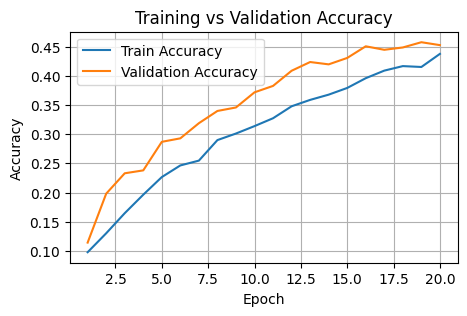

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(range(1, 21), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 21), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
loss, accuracy = test(net, testloader)
print(f"Final test set performance:\nloss {loss}\naccuracy {accuracy}")

Final test set performance:
loss 0.04850189436674118
accuracy 0.4399
